In [ ]:
import io
import os
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
timeSpaceFrame = pd.read_csv('/content/drive/My Drive/Data/YCBS-299/time_space_frame.csv')
frEvents       = pd.read_csv('/content/drive/My Drive/Data/YCBS-299/FR_Events.csv')
socialHousing  = pd.read_csv('/content/drive/My Drive/Data/YCBS-299/social_housing.csv')

In [ ]:
timeSpaceFrame['DateFMT'] = pd.to_datetime(timeSpaceFrame['Date'])
timeSpaceFrame.head()

,Date,Caserne,Quarter,DateFMT
0,01/01/2015,77,Night,2015-01-01
1,01/02/2015,77,Night,2015-01-02
2,01/03/2015,77,Night,2015-01-03
3,01/04/2015,77,Night,2015-01-04
4,01/05/2015,77,Night,2015-01-05


In [ ]:
frEvents['DateFMT'] = pd.to_datetime(frEvents['Date'])
frEvents['Quarter'] = frEvents['Shift'].apply(lambda x: 'Day' if x==1 else 'Evening' if  x==2 else 'Night')
frEvents.head()

,Date,Shift,Caserne,Target,DateFMT,Quarter
0,2019-01-01,3,59,1,2019-01-01,Night
1,2018-01-18,3,52,1,2018-01-18,Night
2,2018-02-21,1,58,1,2018-02-21,Day
3,2016-10-13,2,32,1,2016-10-13,Evening
4,2016-11-13,2,62,1,2016-11-13,Evening


In [ ]:
socialHousing.head()

,borough,COOP_sum,HLM_sum,OBNL_sum,OMHM_sum,SHDM_sum,caserne
0,Le Sud-Ouest,634.0,876.0,283.0,26.0,29.0,3
1,Côte-des-Neiges–Notre-Dame-de-Grâce,298.0,454.0,1189.0,67.0,384.0,4
2,Ville-Marie,133.0,1112.0,186.0,NaN,64.0,5
3,Villeray–Saint-Michel–Parc-Extension,327.0,881.0,305.0,NaN,135.0,9
4,Ville-Marie,NaN,286.0,NaN,NaN,62.0,10


In [ ]:
all_events = pd.merge(timeSpaceFrame, frEvents,  how='left', left_on=['DateFMT','Quarter', 'Caserne'], right_on = ['DateFMT','Quarter','Caserne'])
all_events['WeekDay'] = all_events['DateFMT'].dt.dayofweek
all_events["Month"] = all_events['DateFMT'].dt.month
all_events["Year"] = all_events['DateFMT'].dt.year
all_events = all_events.fillna(0)
all_events=all_events.sort_values(by=['DateFMT','Quarter','Caserne'])
all_events.head()

,Date_x,Caserne,Quarter,DateFMT,Date_y,Shift,Target,WeekDay,Month,Year
330506,01/01/2015,3,Day,2015-01-01,0,0.0,0.0,3,1,2015
237380,01/01/2015,4,Day,2015-01-01,0,0.0,0.0,3,1,2015
18260,01/01/2015,5,Day,2015-01-01,2015-01-01,1.0,14.0,3,1,2015
286682,01/01/2015,8,Day,2015-01-01,0,0.0,0.0,3,1,2015
133298,01/01/2015,9,Day,2015-01-01,0,0.0,0.0,3,1,2015


In [ ]:
to_antoine = all_events[['Caserne','Quarter','DateFMT','Target']]
to_antoine.to_csv('/content/drive/My Drive/Data/YCBS-299/Tony.csv')

In [ ]:
events_caserne = all_events_h[['Caserne','Target']].groupby(['Caserne']).mean()
events_caserne.reset_index(level=0, inplace=True)
events_caserne_housing = pd.merge(events_caserne, socialHousing,  how='left', left_on=['Caserne'], right_on = ['caserne']).fillna(0)
events_caserne_housing['AllHousing'] = events_caserne_housing['COOP_sum'] + events_caserne_housing['HLM_sum'] + events_caserne_housing['OBNL_sum'] + events_caserne_housing['OMHM_sum'] + events_caserne_housing['SHDM_sum'] 

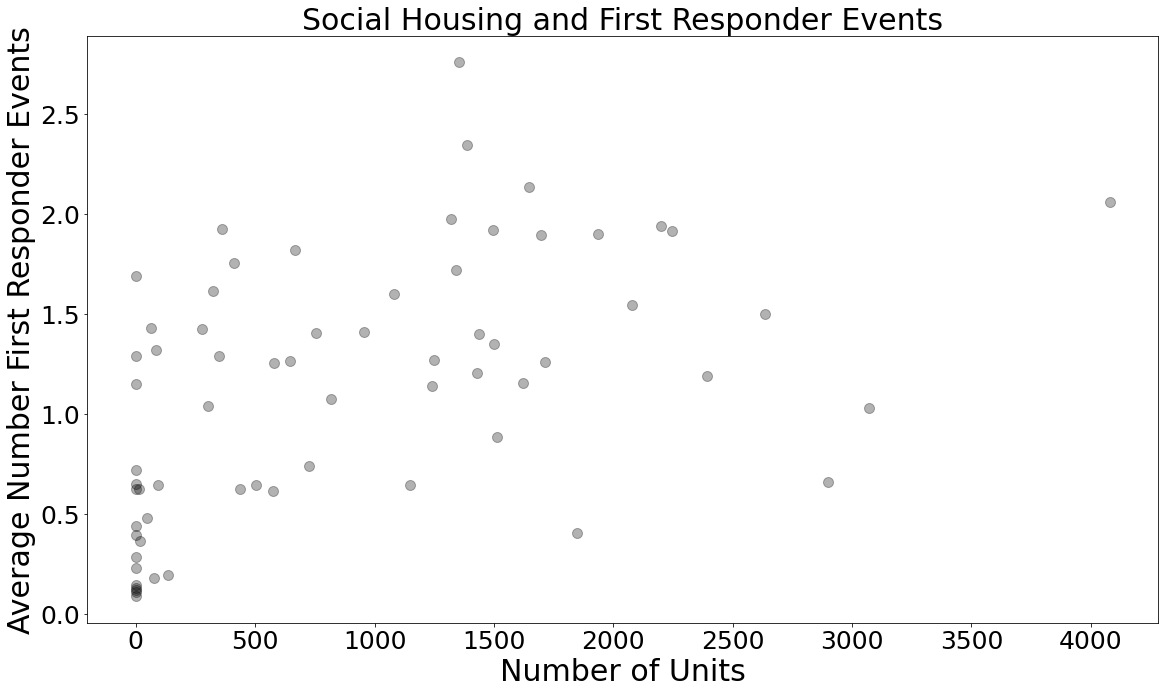

In [ ]:
fig, ax = plt.subplots(figsize=(19.20,10.80))
plt.scatter(events_caserne_housing['AllHousing'], events_caserne_housing['Target'], facecolor = "black", alpha = .3, s=100)
plt.xlabel("Number of Units", fontsize=30)
plt.ylabel("Average Number First Responder Events", fontsize=30)
ax.tick_params(labelsize=25)
plt.title("Social Housing and First Responder Events", fontsize=30)
plt.savefig('/content/drive/My Drive/Data/YCBS-299/socialHousing_plot.png')

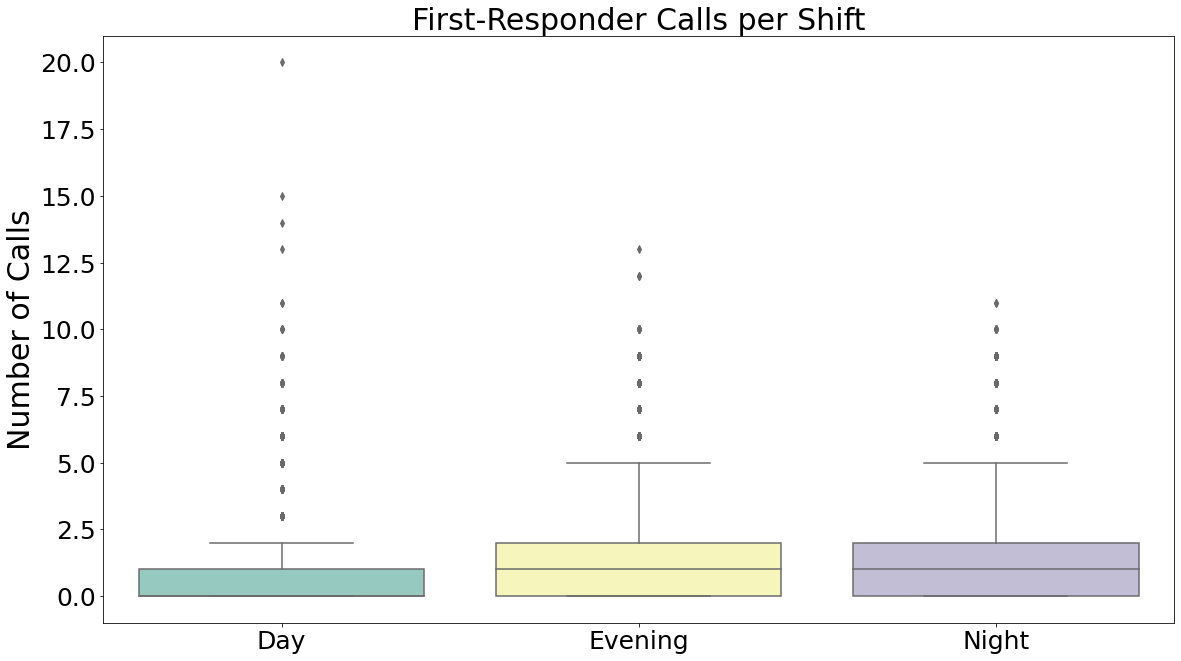

In [ ]:
fig, ax = plt.subplots(figsize=(19.20,10.80))
quarter = sns.boxplot(x="Quarter", y="Target", data=all_events_h, palette="Set3", ax=ax)
plt.xlabel('', fontsize=30)
plt.ylabel('Number of Calls', fontsize=30)
ax.tick_params(labelsize=25)
plt.title("First-Responder Calls per Shift", fontsize=30)
plt.savefig('/content/drive/My Drive/Data/YCBS-299/quarter_plot.png')

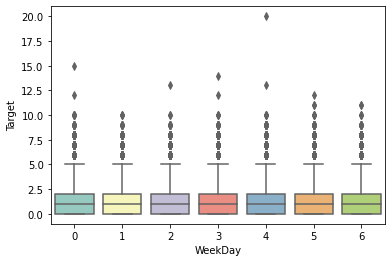

In [ ]:
#sns.boxplot(x="WeekDay", y="Target", data=all_events_h, palette="Set3")


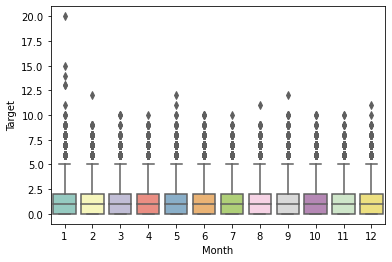

In [ ]:
sns.boxplot(x="Month", y="Target", data=all_events_h, palette="Set3")

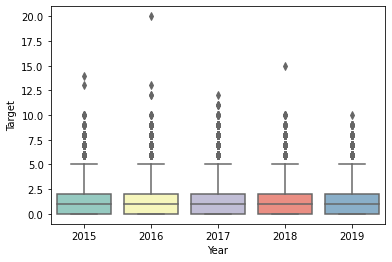

In [ ]:
sns.boxplot(x="Year", y="Target", data=all_events_h, palette="Set3")

In [ ]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

caserne77 = all_events_h[all_events_h['Caserne']==77]

# Draw Plot
# fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
# plot_acf(caserne77["Target"], lags=50, ax=axes[0])
# plot_pacf(caserne77["Target"], lags=50, ax=axes[1])

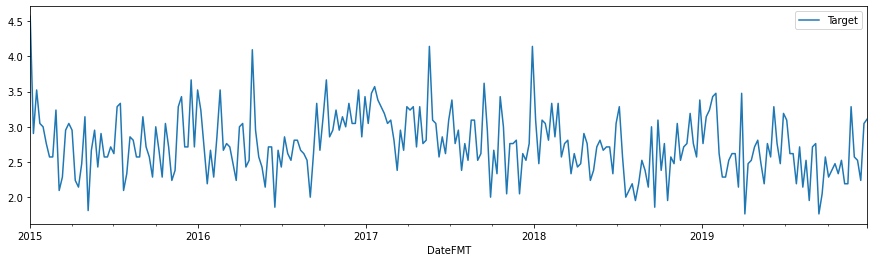

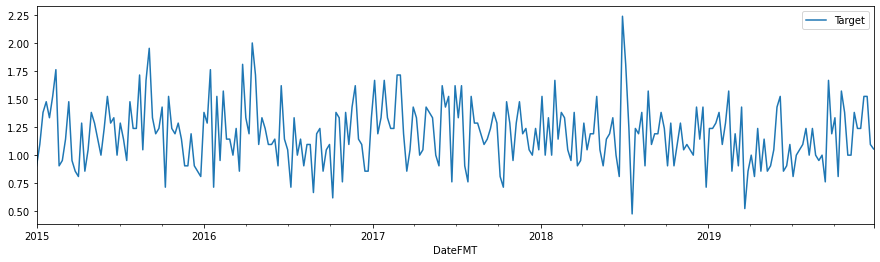

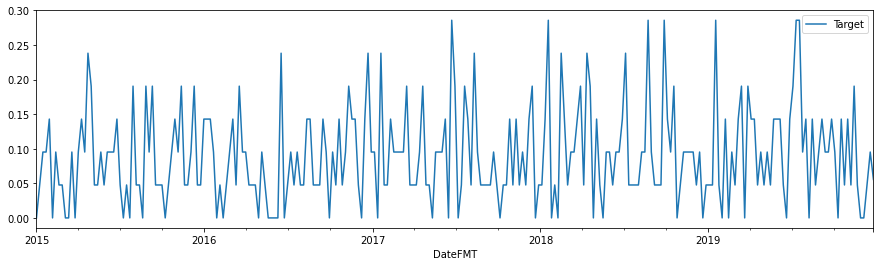

In [ ]:
Caserne_65 = all_events_h[all_events_h['Caserne']==65].set_index(['DateFMT'])
Caserne_4 = all_events_h[all_events_h['Caserne']==4].set_index(['DateFMT'])
Caserne_62 = all_events_h[all_events_h['Caserne']==62].set_index(['DateFMT'])

Caserne_65[["Target"]].mean().plot(figsize=(15,4))
Caserne_4[["Target"]].resample("7d").mean().plot(figsize=(15,4))
Caserne_62[["Target"]].resample("7d").mean().plot(figsize=(15,4))

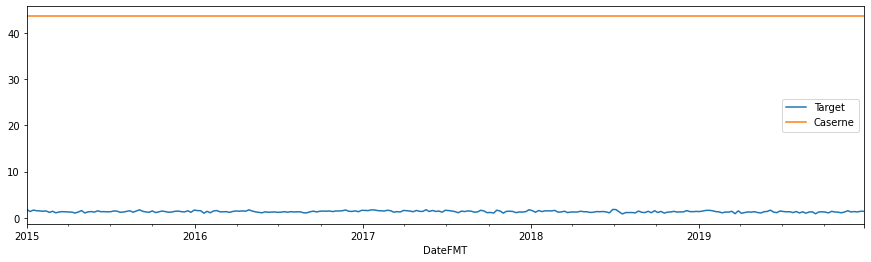

In [ ]:
Casernes = all_events_h[all_events_h['Caserne'].isin([65,4,62])].set_index(['DateFMT'])

Casernes[["Target",'Caserne']].resample("7d").mean().plot(figsize=(15,4))

In [ ]:
test = all_events_h[['Caserne','Target']].groupby(['Caserne']).var()
test.head()

,Target
Caserne,
3,0.431039
4,1.389687
5,2.586186
8,0.300979
9,2.612167
